# <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Traffic Accidents in the UK (2005 to 2015) :

### we will load the data before we start the analysis which consists of two files Accidents and Vehicles.
all features are represented as numbers

In [3]:
## Import libraries necessary for this project
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [359]:
# load the two data (Accident,Vehicles) to work on it
Accident = pd.read_csv('C:/Users/Zilal/Desktop/GA/Capstone_data/Accidents_2005.csv')
Vehicles = pd.read_csv('C:/Users/Zilal/Desktop/GA/Capstone_data/Vehicle_2005.csv')

In [360]:
# Merging two data sets into one with inner join by index
Acc_Veh_Merge = pd.merge(Accident, Vehicles, how = 'inner', on = 'Accident_Index')

In [361]:
#Check data shape
Acc_Veh_Merge.shape

(1805908, 55)

In [362]:
#Check data head
Acc_Veh_Merge.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005


# The sample of data :

#### Due to size of dataset, I will take a Sample

In [363]:
#Extract 20000 random elements from the orginal data
Sub_Acc_Veh=Acc_Veh_Merge.sample(n=20000)

In [364]:
#Save your results as a CSV
Sub_Acc_Veh = Sub_Acc_Veh.reset_index(drop=True)
Sub_Acc_Veh.to_csv("C:/Users/Zilal/Desktop/GA/Capstone_data/Sub_Accident.csv")

In [4]:
# load data to work on it
Sub_Acc_Veh = pd.read_csv('C:/Users/Zilal/Desktop/GA/Capstone_data/Sub_Accident.csv')

# Data Exploration:

In [5]:
# the shape of the sample dataset
Sub_Acc_Veh.shape

(20000, 56)

In [6]:
# head of the dataset
Sub_Acc_Veh.head(2)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,0,2012471203302,531890.0,103850.0,-0.129019,50.819116,47,2,1,1,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Goods over 3.5t. and under 7.5t,No,Nearside,2012
1,1,2005445DG0002,430150.0,102590.0,-1.573353,50.822007,44,3,2,1,...,None,No tow/articulation,Nearside,0.0,Going ahead other,2,Car,No,Offside,2005


In [7]:
#display all columns and rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [8]:
#drop unnamed columns
Sub_Acc_Veh.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
#columns dtype
Sub_Acc_Veh.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [10]:
#The Column names
Sub_Acc_Veh.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_

# Data Cleaning:

#### - we will handle missing values. 

#### - dropping unuseful columns.

#### - rename some columns.

#### - check for duplicate data.

In [11]:
#rename the columns
Sub_Acc_Veh=Sub_Acc_Veh.rename(columns ={'Did_Police_Officer_Attend_Scene_of_Accident': 'Police_Officer_Attend','Pedestrian_Crossing-Human_Control':'Ped_Cross_Human','Pedestrian_Crossing-Physical_Facilities':'Ped_Cross_Facilities','Road_Surface_Conditions':'Road_Conditions','Urban_or_Rural_Area':'Urban_Rural','Weather_Conditions':'Weather','Journey_Purpose_of_Driver':'Journey_Purpose','Propulsion_Code':'Vehicle_Propulsion_Code','Vehicle_Location.Restricted_Lane':'Vehicle_Location','Engine_Capacity_.CC.':'Engine_Capacity'})

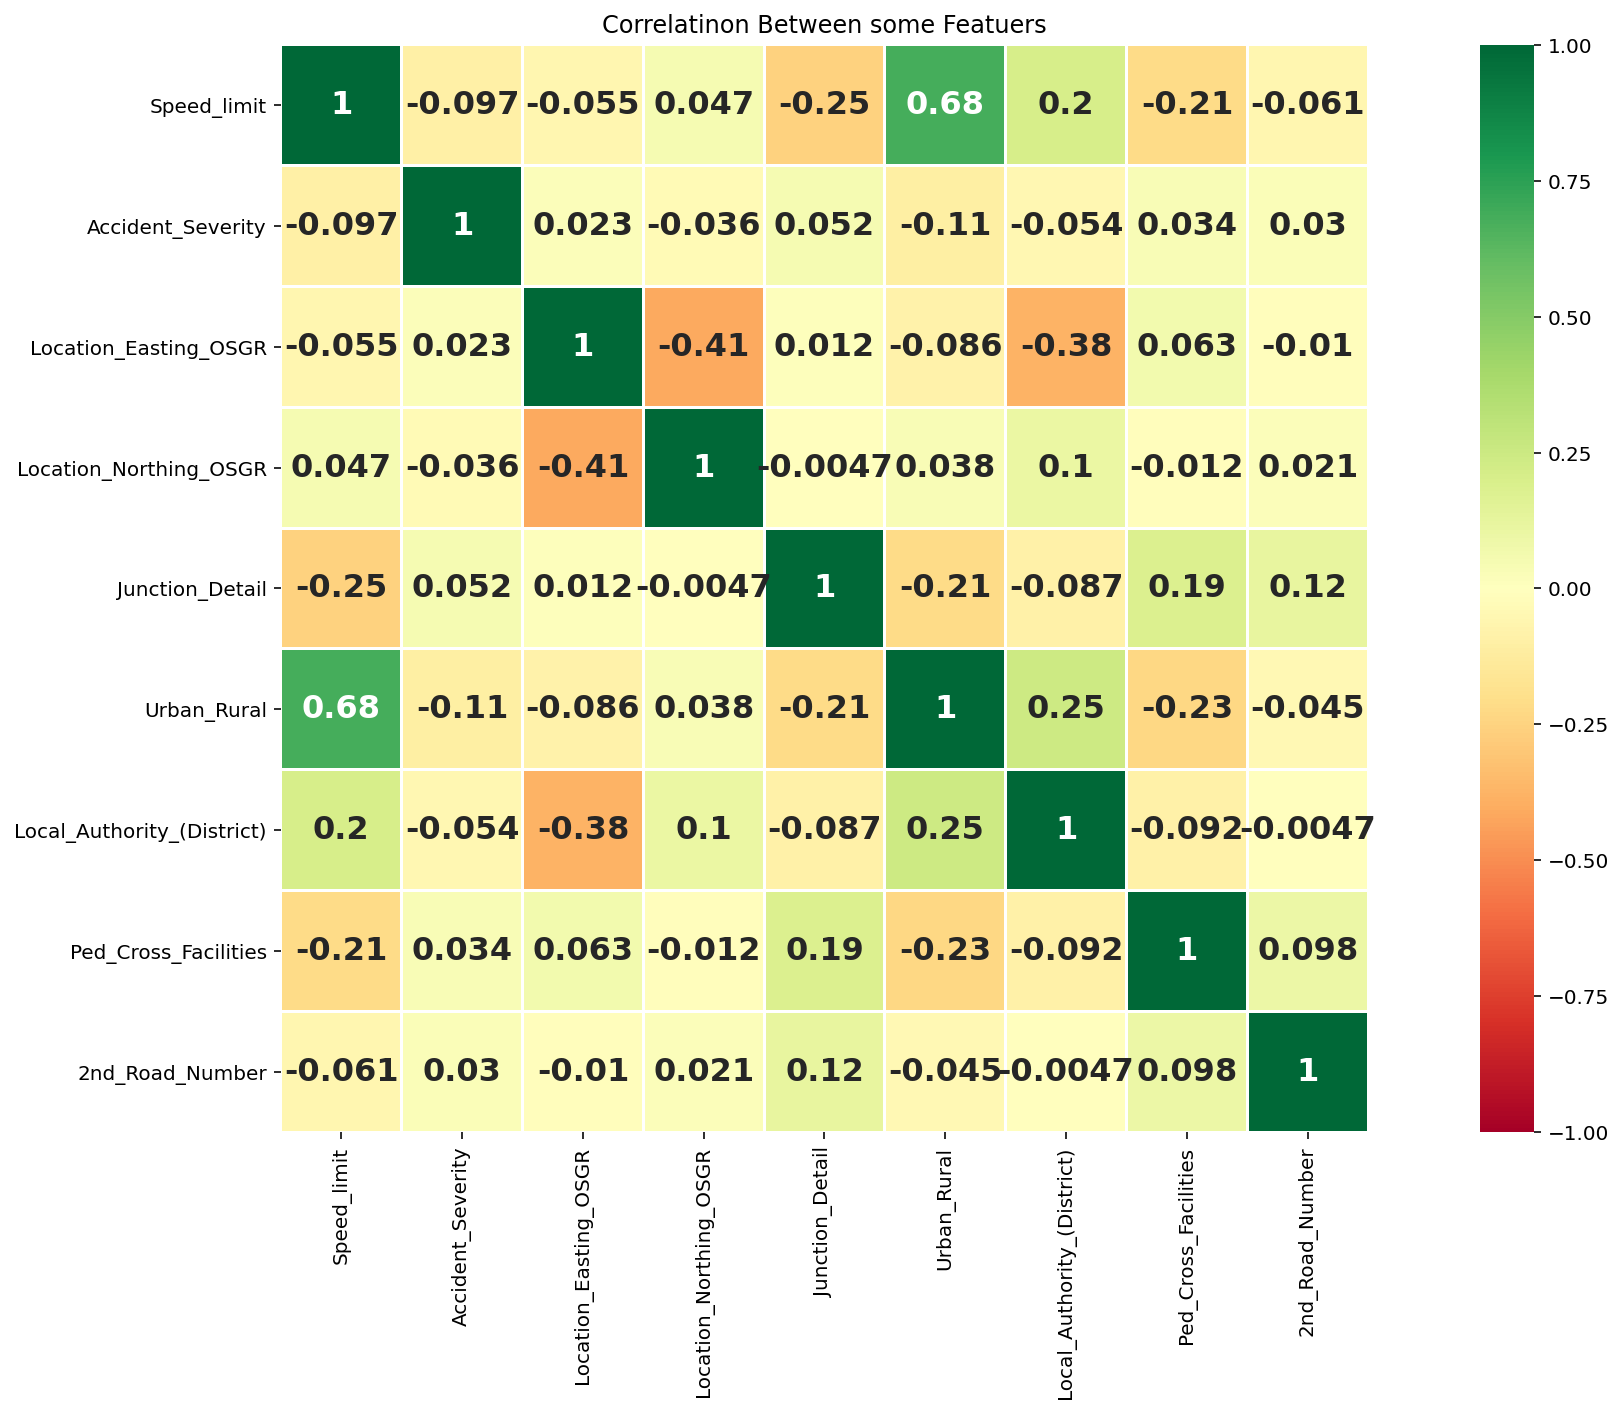

In [12]:
#The correlation between featuers with speed_limit and Number_of_Casualties. 
#drop the less important columns
unimportant_columns= Sub_Acc_Veh[['Speed_limit','Accident_Severity','Location_Easting_OSGR','Location_Northing_OSGR','Junction_Detail','Urban_Rural','Local_Authority_(District)','Ped_Cross_Facilities','2nd_Road_Number']]
plt.figure(figsize=(20,10))
sns.heatmap(unimportant_columns.corr(),annot=True,cmap="RdYlGn",vmin=-1,vmax=1,annot_kws={'fontsize':16,'fontweight':'bold'},linewidth=1,square=True);
plt.title("Correlatinon Between some Featuers");

In [13]:
# Remove unimportant columns from dataframe
Sub_Acc_Veh.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location','Driver_IMD_Decile',
                'Junction_Control' ,'2nd_Road_Class','Junction_Detail','X1st_Point_of_Impact'], axis=1, inplace=True)

In [14]:
#check for duplicate data
duplicate=Sub_Acc_Veh.duplicated()
print('The number of duplicates :' ,duplicate.sum())
Sub_Acc_Veh[duplicate]

The number of duplicates : 0


,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,Year


In [15]:
# No null values in dataframe
Sub_Acc_Veh.isnull().sum().sort_values(ascending=False)

Age_of_Vehicle                 3030
model                          2790
Engine_Capacity                2151
Vehicle_Propulsion_Code        1981
make                            703
Vehicle_Location                  2
Time                              2
Latitude                          1
Longitude                         1
Accident_Index                    0
Driver_Home_Area_Type             0
Hit_Object_in_Carriageway         0
Hit_Object_off_Carriageway        0
Journey_Purpose                   0
Junction_Location                 0
Sex_of_Driver                     0
Police_Officer_Attend             0
Skidding_and_Overturning          0
Towing_and_Articulation           0
Vehicle_Leaving_Carriageway       0
Vehicle_Manoeuvre                 0
Vehicle_Reference                 0
Vehicle_Type                      0
Was_Vehicle_Left_Hand_Drive       0
Age_Band_of_Driver                0
Carriageway_Hazards               0
Urban_Rural                       0
1st_Road_Class              

In [16]:
# replace (-1) to NaN: 
Sub_Acc_Veh.replace(-1, 'NaN', inplace=True)

In [17]:
# Removing NaN 
Sub_Acc_Veh.dropna(axis = 0, inplace = True)

In [18]:
# # Removing (-1)
# for col in Sub_Acc_Veh.columns:
#     Sub_Acc_Veh= (Sub_Acc_Veh[Sub_Acc_Veh[col]!=-1])

In [19]:
# the shape of data after cleaning.
Sub_Acc_Veh.shape

(15170, 47)

In [20]:
#info of the dataset
Sub_Acc_Veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15170 entries, 1 to 19999
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Accident_Index               15170 non-null  object 
 1   Longitude                    15170 non-null  float64
 2   Latitude                     15170 non-null  float64
 3   Police_Force                 15170 non-null  int64  
 4   Accident_Severity            15170 non-null  int64  
 5   Number_of_Vehicles           15170 non-null  int64  
 6   Number_of_Casualties         15170 non-null  int64  
 7   Date                         15170 non-null  object 
 8   Day_of_Week                  15170 non-null  int64  
 9   Time                         15170 non-null  object 
 10  Local_Authority_(District)   15170 non-null  int64  
 11  Local_Authority_(Highway)    15170 non-null  object 
 12  1st_Road_Class               15170 non-null  int64  
 13  1st_Road_Number 

In [21]:
# Summary statistics for numerical columns
Sub_Acc_Veh.describe()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,Speed_limit,Light_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_Rural,Age_of_Vehicle,Engine_Capacity,Vehicle_Location,Vehicle_Reference,Year
count,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,...,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000
mean,-1.412643,52.551473,30.396704,2.853461,2.139552,1.473105,4.105801,349.876467,3.972775,1001.281015,...,39.969677,1.914305,0.106658,0.065854,1.372182,6.855043,1665.444166,0.087278,1.555043,2010.713184
std,1.373669,1.425889,24.907064,0.388139,0.980311,0.970306,1.922782,253.274393,1.442957,1802.765987,...,14.586362,1.610881,0.711981,0.574883,0.483402,4.317789,741.831056,0.818181,0.795885,2.983253
min,-6.386228,49.995483,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,20.000000,1.000000,0.000000,0.000000,1.000000,1.000000,44.000000,0.000000,1.000000,2005.000000
25%,-2.301605,51.485844,7.000000,3.000000,2.000000,1.000000,2.000000,128.000000,3.000000,1.000000,...,30.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1299.000000,0.000000,1.000000,2009.000000
50%,-1.385201,52.261621,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,3.000000,134.000000,...,30.000000,1.000000,0.000000,0.000000,1.000000,6.000000,1598.000000,0.000000,1.000000,2011.000000
75%,-0.239060,53.457029,45.000000,3.000000,2.000000,2.000000,6.000000,516.000000,6.000000,720.750000,...,50.000000,4.000000,0.000000,0.000000,2.000000,10.000000,1994.000000,0.000000,2.000000,2013.000000
max,1.758337,60.008847,98.000000,3.000000,37.000000,36.000000,7.000000,941.000000,6.000000,9963.000000,...,70.000000,7.000000,7.000000,7.000000,2.000000,43.000000,12600.000000,9.000000,31.000000,2015.000000


# Data Analysis:

#### We will plot some graphs to analysis the data and will try to answer some necessary questions

#### we used timestamp feature to explain more features such as: Year, Month, Day of the week

In [22]:
#create new column Date and Time
Sub_Acc_Veh['Date_time'] = Sub_Acc_Veh['Date'] +' '+ Sub_Acc_Veh['Time']

In [23]:
# time series features:
time_format = '%d/%m/%Y %H:%M'
Sub_Acc_Veh['Date_time'] = pd.to_datetime(Sub_Acc_Veh['Date_time'], format=time_format)
Sub_Acc_Veh.drop(['Date','Time'],axis =1 , inplace=True)
Sub_Acc_Veh.dropna(inplace=True)

#### - When do accidents usually happen (Month/Day/Hours)?

Text(0, 0.5, 'Accident counts')

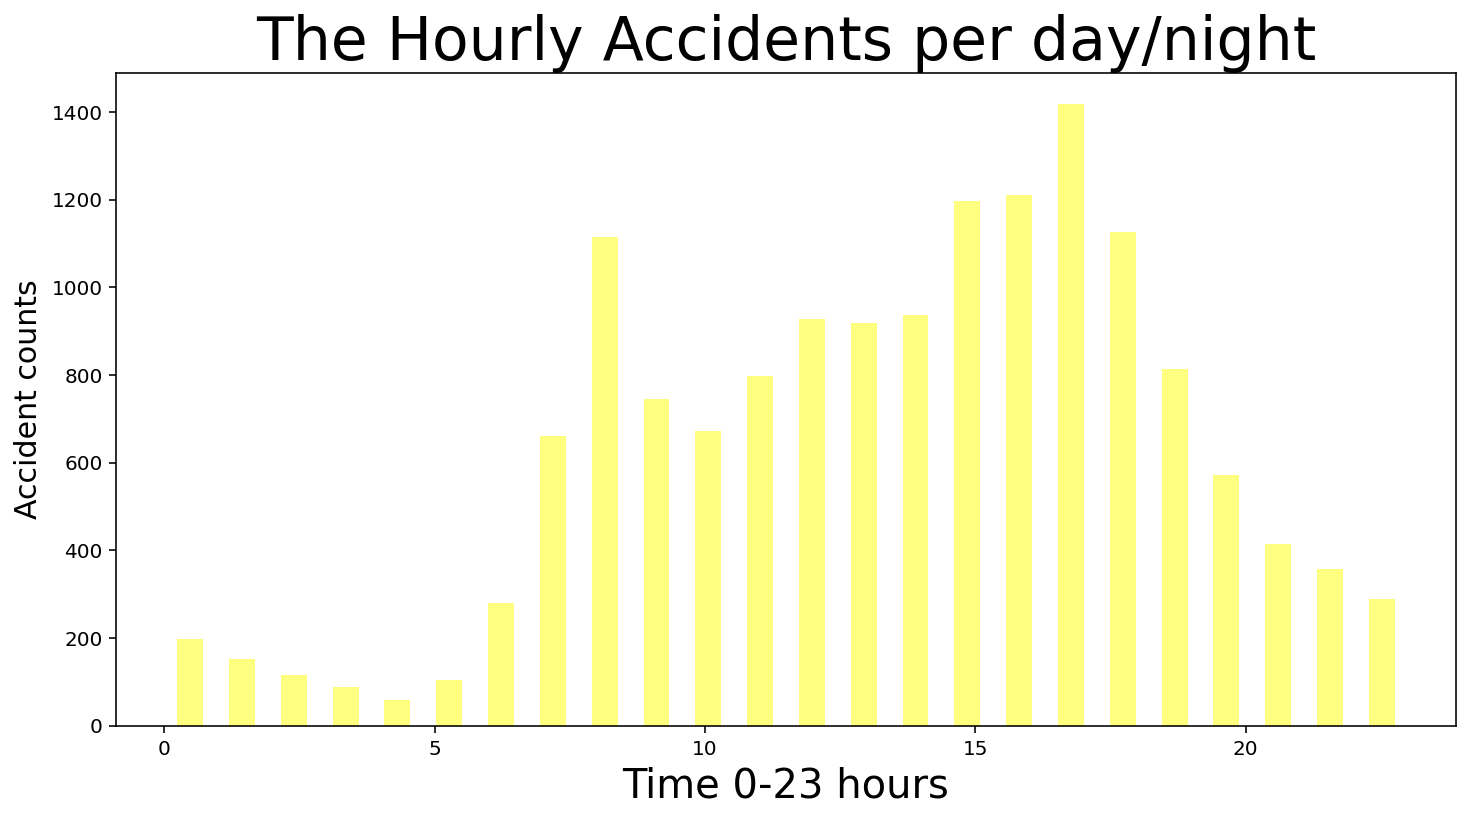

In [24]:
#Accidents by Hours.
plt.figure(figsize=(12,6))
Sub_Acc_Veh.Date_time.dt.hour.hist(rwidth=0.50,alpha =0.50, color= 'Yellow',bins=24)
plt.title('The Hourly Accidents per day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident counts' , fontsize = 15)

#### The bar chart presents information about the amount of accidents that happened during a day.
It is clear that most of the accidents happened in the afternoon between 4-6  or in the morning at 9
We can assume that this time of the day has the most traffic moving such as people going to or leaving their work.

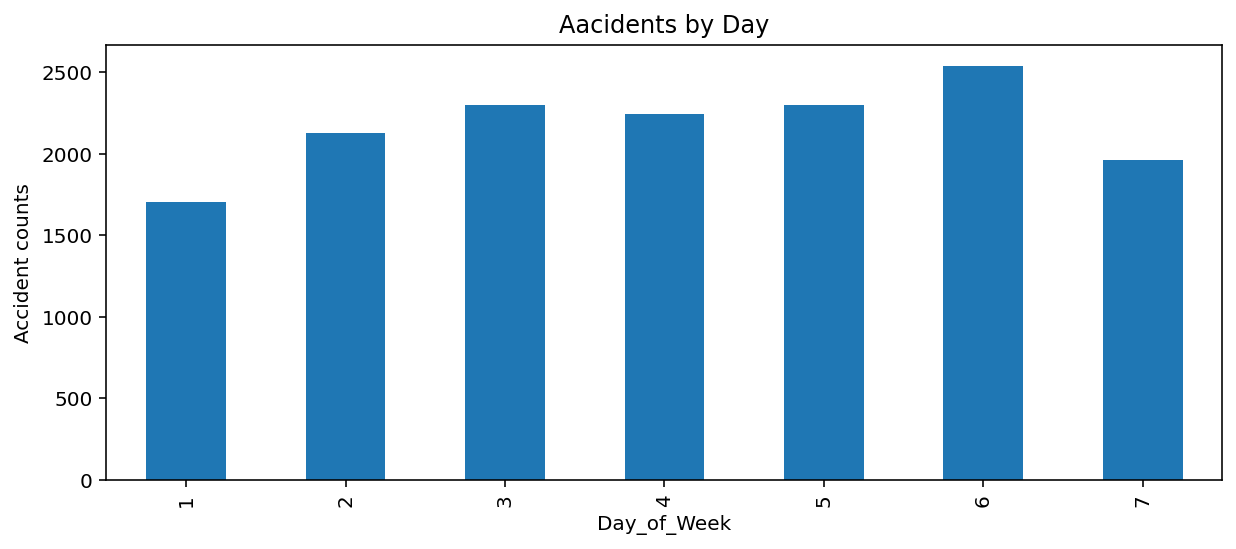

In [25]:
##Accidents by Day.
plt.figure(figsize=(10,4))
plt.title('Aacidents by Day')
plt.ylabel('Accident counts')
Sub_Acc_Veh.groupby('Day_of_Week')['Date_time'].count().plot(kind='bar')
plt.show()

#### As we can see that Friday has the highest amount of accidents before the weekend.
We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

Text(0.5, 0, '1-Jan,    2-Feb  ,   3-Mar ,  4-Apr ,  5-May, 6-June, 7-July, 8-Auguset , 9-Sep , 10- Oct , 11-Nov,  12-Dec ')

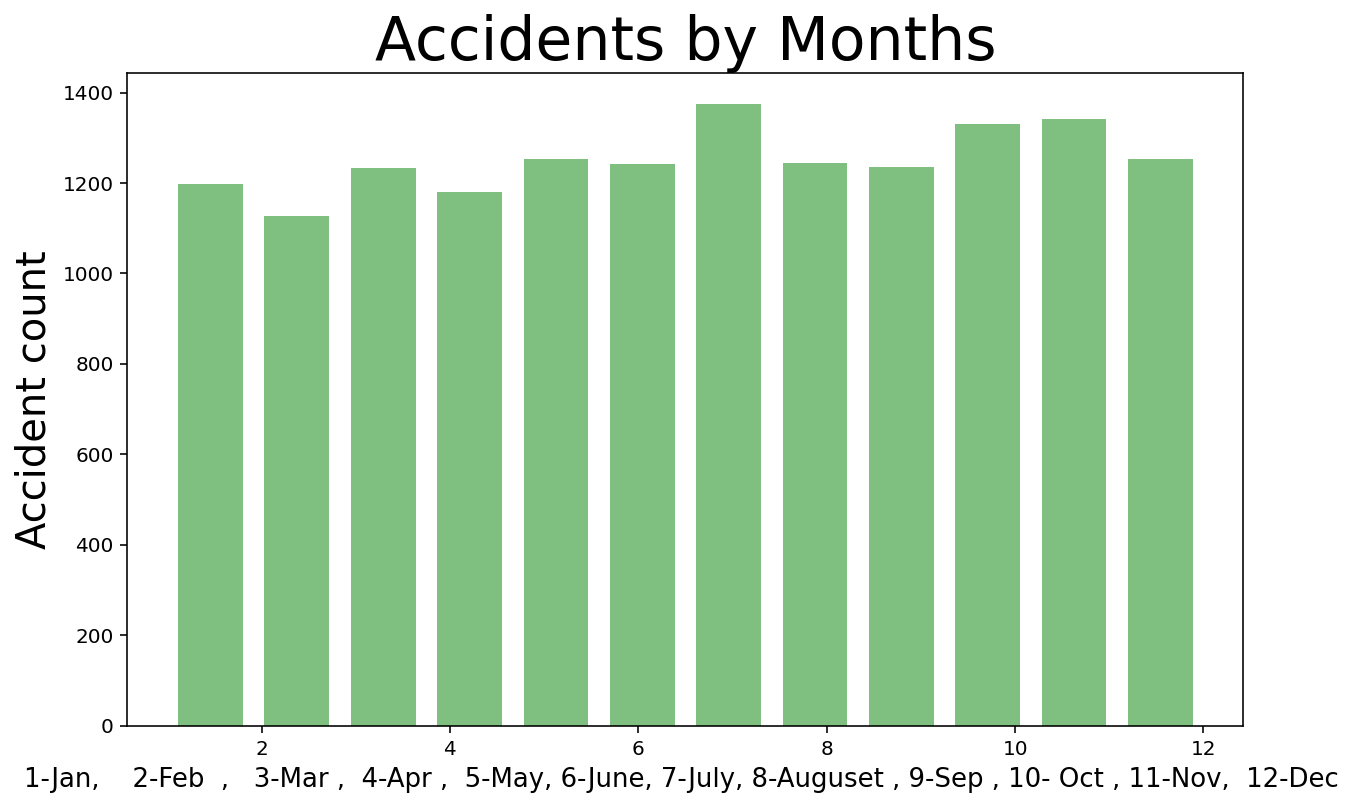

In [432]:
#Accidents by month
plt.figure(figsize=(10,6))
Sub_Acc_Veh.Date_time.dt.month.hist(bins=12,rwidth=0.75,alpha=0.5, color= 'green')
plt.title('Accidents by Months' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('1-Jan,    2-Feb  ,   3-Mar ,  4-Apr ,  5-May, 6-June, 7-July, 8-Auguset , 9-Sep , 10- Oct , 11-Nov,  12-Dec ', fontsize = 13)

#### It is noticeable that February had the lowest number of accidents in ten years.
On the other hand, the summer months account for the most accidents, especially July due to the increase in holidays,
while in October and November they are relatively close to the accidents of the summer months due to the New Year celebrations.

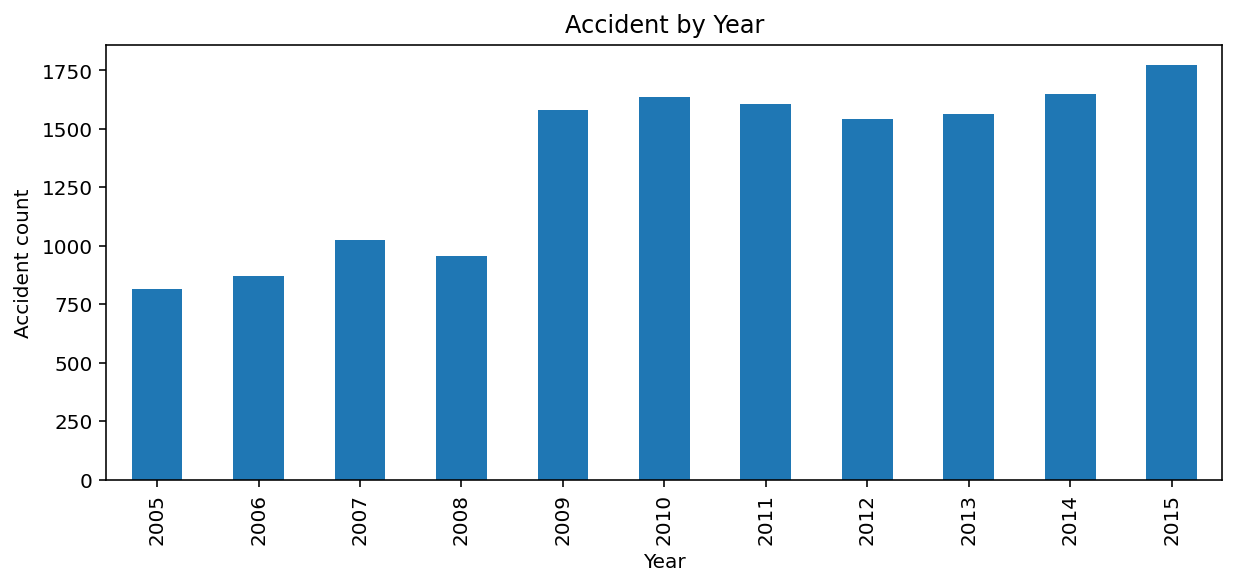

In [431]:
#Accidents by year
plt.figure(figsize=(10,4))
plt.title('Accident by Year')
plt.ylabel('Accident count')
Sub_Acc_Veh.groupby('Year')['Date_time'].count().plot(kind='bar')
plt.show()

#### It is clear that the number of accidents is increasing between 2009 to 2014, perhaps due to the increase in the number of people and the number of cars, so that lead to increase the congestion

#### What is the age and gender distribution of drivers involved in the accidents?
In order to target road safety campaigns effectively, we must understand our targeted audience

In [31]:
# value_counts (Age)
Sub_Acc_Veh.Age_Band_of_Driver.value_counts()

26 - 35                         3211
36 - 45                         2943
46 - 55                         2324
21 - 25                         1814
56 - 65                         1417
16 - 20                         1357
Data missing or out of range    1005
66 - 75                          676
Over 75                          420
11 - 15                            3
Name: Age_Band_of_Driver, dtype: int64

In [32]:
#replace /Data missing or out of range/
Sub_Acc_Veh['Age_Band_of_Driver']=Sub_Acc_Veh.Age_Band_of_Driver.replace(['Data missing or out of range',""])

In [33]:
Sub_Acc_Veh.Age_Band_of_Driver.value_counts(ascending=True)

11 - 15       3
Over 75     450
66 - 75     727
16 - 20    1446
56 - 65    1525
21 - 25    1959
46 - 55    2484
36 - 45    3169
26 - 35    3407
Name: Age_Band_of_Driver, dtype: int64

Text(0.5, 0, 'Age of Drivers')

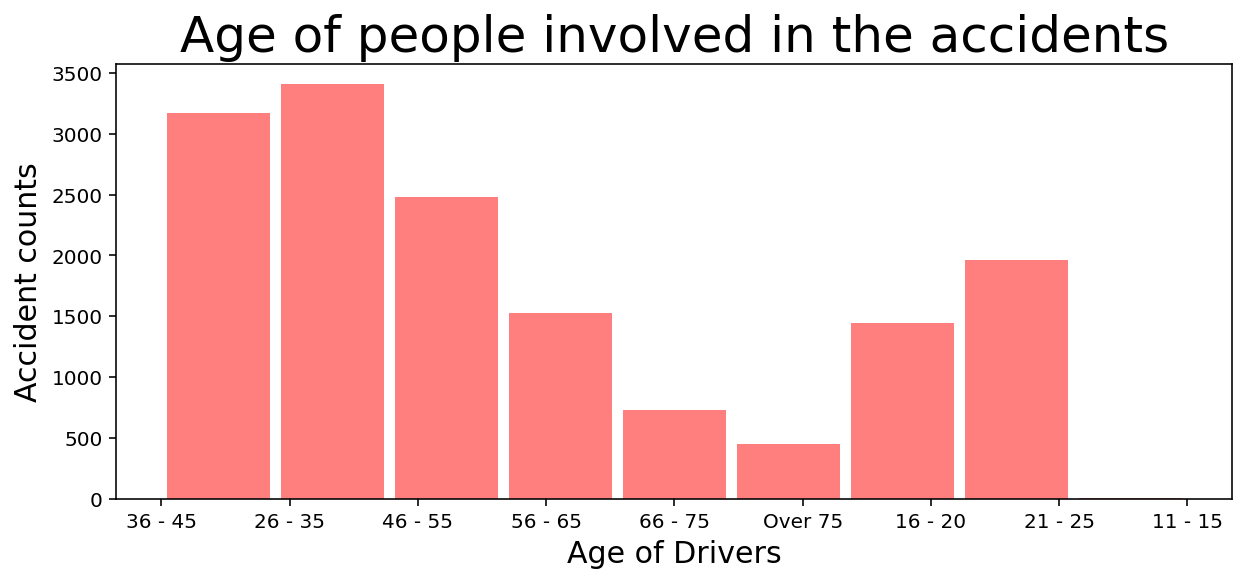

In [43]:
plt.figure(figsize=(10,4))
Sub_Acc_Veh.Age_Band_of_Driver.hist(bins = 9,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
plt.ylabel('Accident counts' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15)

#### We notice that the high number of accidents by drivers between 26-35 and 36-45 are more than the number of accidents
by drivers from different ages.
On the other hands, it is low between 66-75  and over 75 age.

C:\Users\Zilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


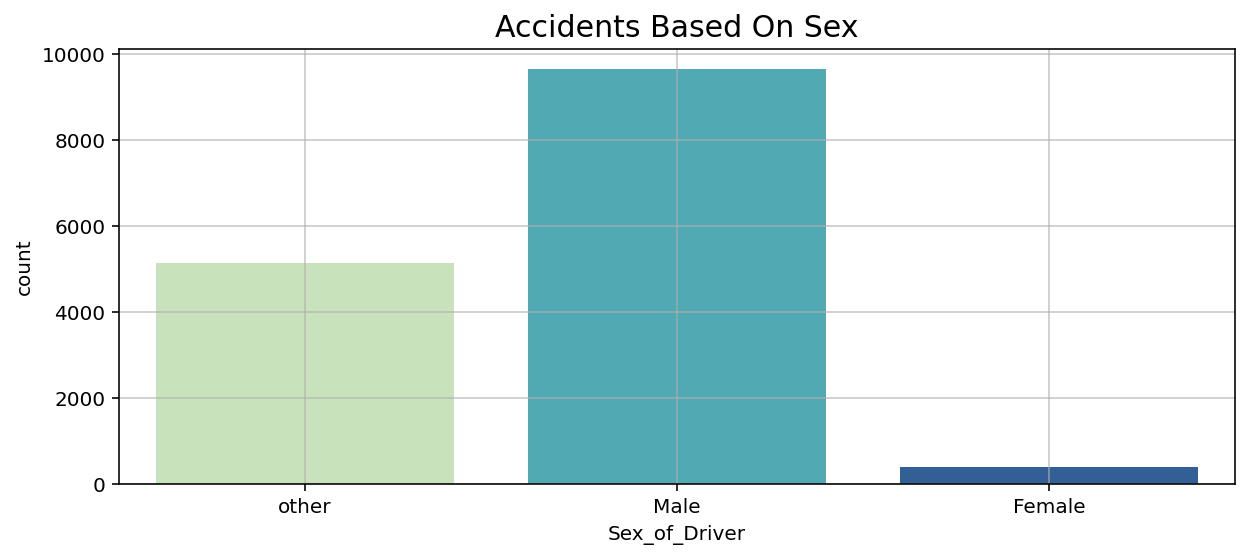

In [47]:
##Accidents by sex
plt.figure(figsize=(10,4))
ax=sns.countplot(Sub_Acc_Veh['Sex_of_Driver'], palette = "YlGnBu")
plt.title('Accidents Based On Sex', fontsize=15)
ax.set_xticklabels(['other','Male','Female'])
plt.grid(alpha=0.7)

#### It clearly shows that most of the accidents are occured by males.

#### We will take a closer look at accidents that occur under some circumstances:
    (Light Conditions, road type, speed limit,...)

C:\Users\Zilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


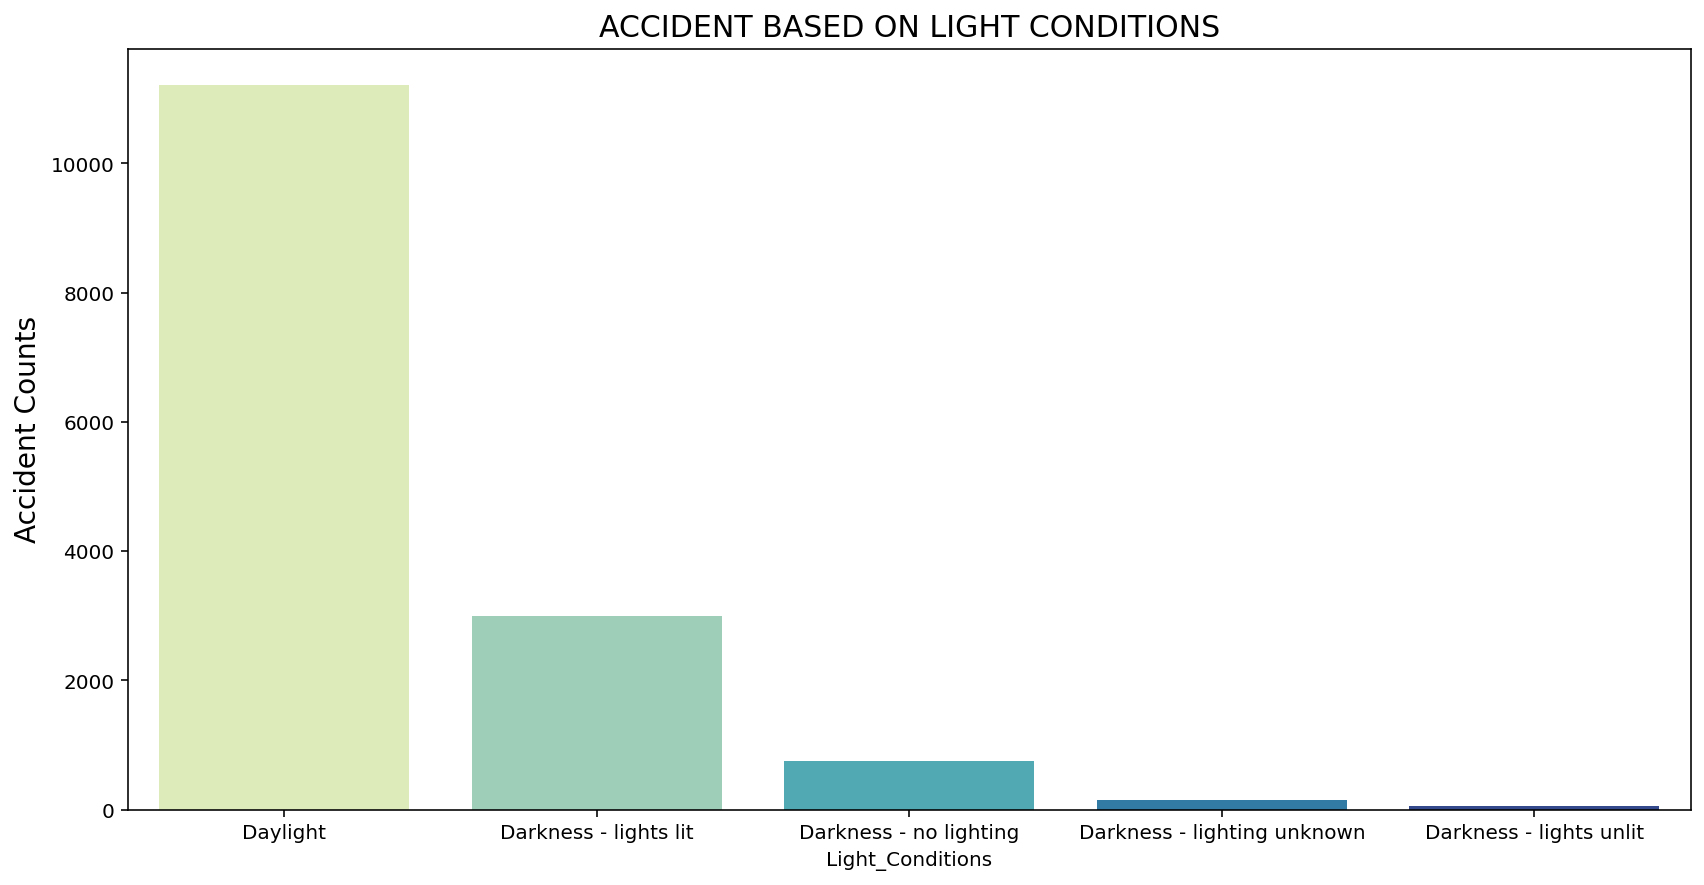

In [51]:
plt.figure(figsize=(14,7))
ax=sns.countplot('Light_Conditions',data=Sub_Acc_Veh,
                 order = Sub_Acc_Veh["Light_Conditions"].value_counts().index,
                 palette = "YlGnBu") 
ax.set_xticklabels(['Daylight','Darkness - lights lit',
                    'Darkness - no lighting',
                    'Darkness - lighting unknown',
                    'Darkness - lights unlit'])
plt.title('ACCIDENT BASED ON LIGHT CONDITIONS',fontsize=15)
plt.ylabel("Accident Counts", fontsize = 14)
plt.show()

#### it clearly shows that most of the accidents are occured in the daylight time

In [315]:
#show unique columns
#Vehicles.apply(pd.Series.value_counts)

In [443]:
Sub_Acc_Veh["Age_of_Vehicle"].value_counts()

1.0     1501
2.0     1279
3.0     1272
5.0     1233
4.0     1186
7.0     1153
6.0     1151
8.0     1116
9.0     1100
10.0     938
11.0     812
12.0     681
13.0     560
14.0     356
15.0     235
16.0     172
17.0      93
18.0      48
19.0      37
20.0      20
22.0      19
21.0      15
23.0       8
27.0       6
24.0       6
26.0       4
31.0       2
25.0       2
35.0       2
30.0       2
43.0       1
39.0       1
28.0       1
40.0       1
Name: Age_of_Vehicle, dtype: int64

<AxesSubplot:title={'center':'Age of Vehicle'}>

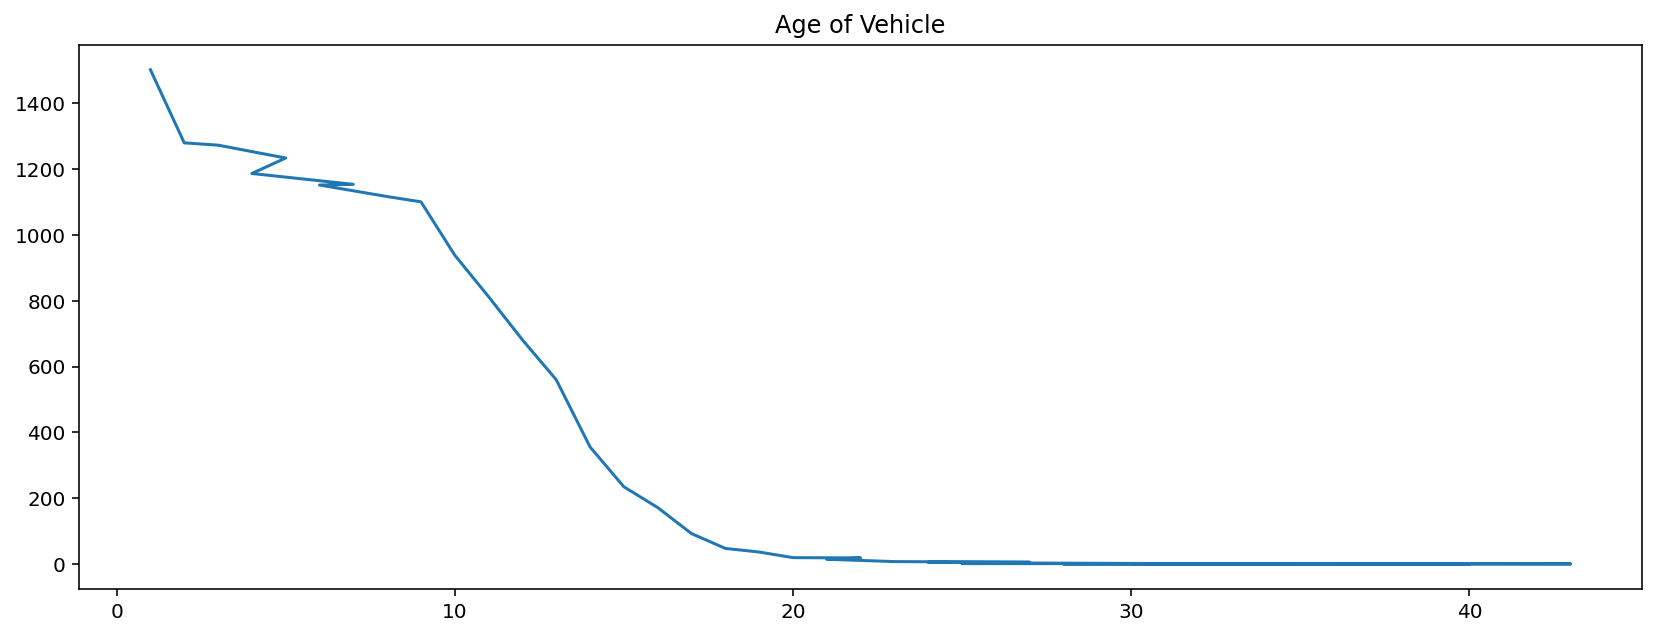

In [441]:
(Sub_Acc_Veh.Age_of_Vehicle.value_counts().plot(title = "Age of Vehicle", figsize=(14,5)))


In [440]:
Sub_Acc_Veh["Vehicle_Type"].value_counts()

Car                                      12624
Van / Goods 3.5 tonnes mgw or under        836
Motorcycle over 500cc                      473
Motorcycle 125cc and under                 385
Taxi/Private hire car                      380
Motorcycle 50cc and under                  126
Motorcycle over 125cc and up to 500cc      110
Goods 7.5 tonnes mgw and over               28
Other vehicle                               15
Goods over 3.5t. and under 7.5t             14
Minibus (8 - 16 passenger seats)            14
Bus or coach (17 or more pass seats)         6
Motorcycle - unknown cc                      1
Goods vehicle - unknown weight               1
Name: Vehicle_Type, dtype: int64

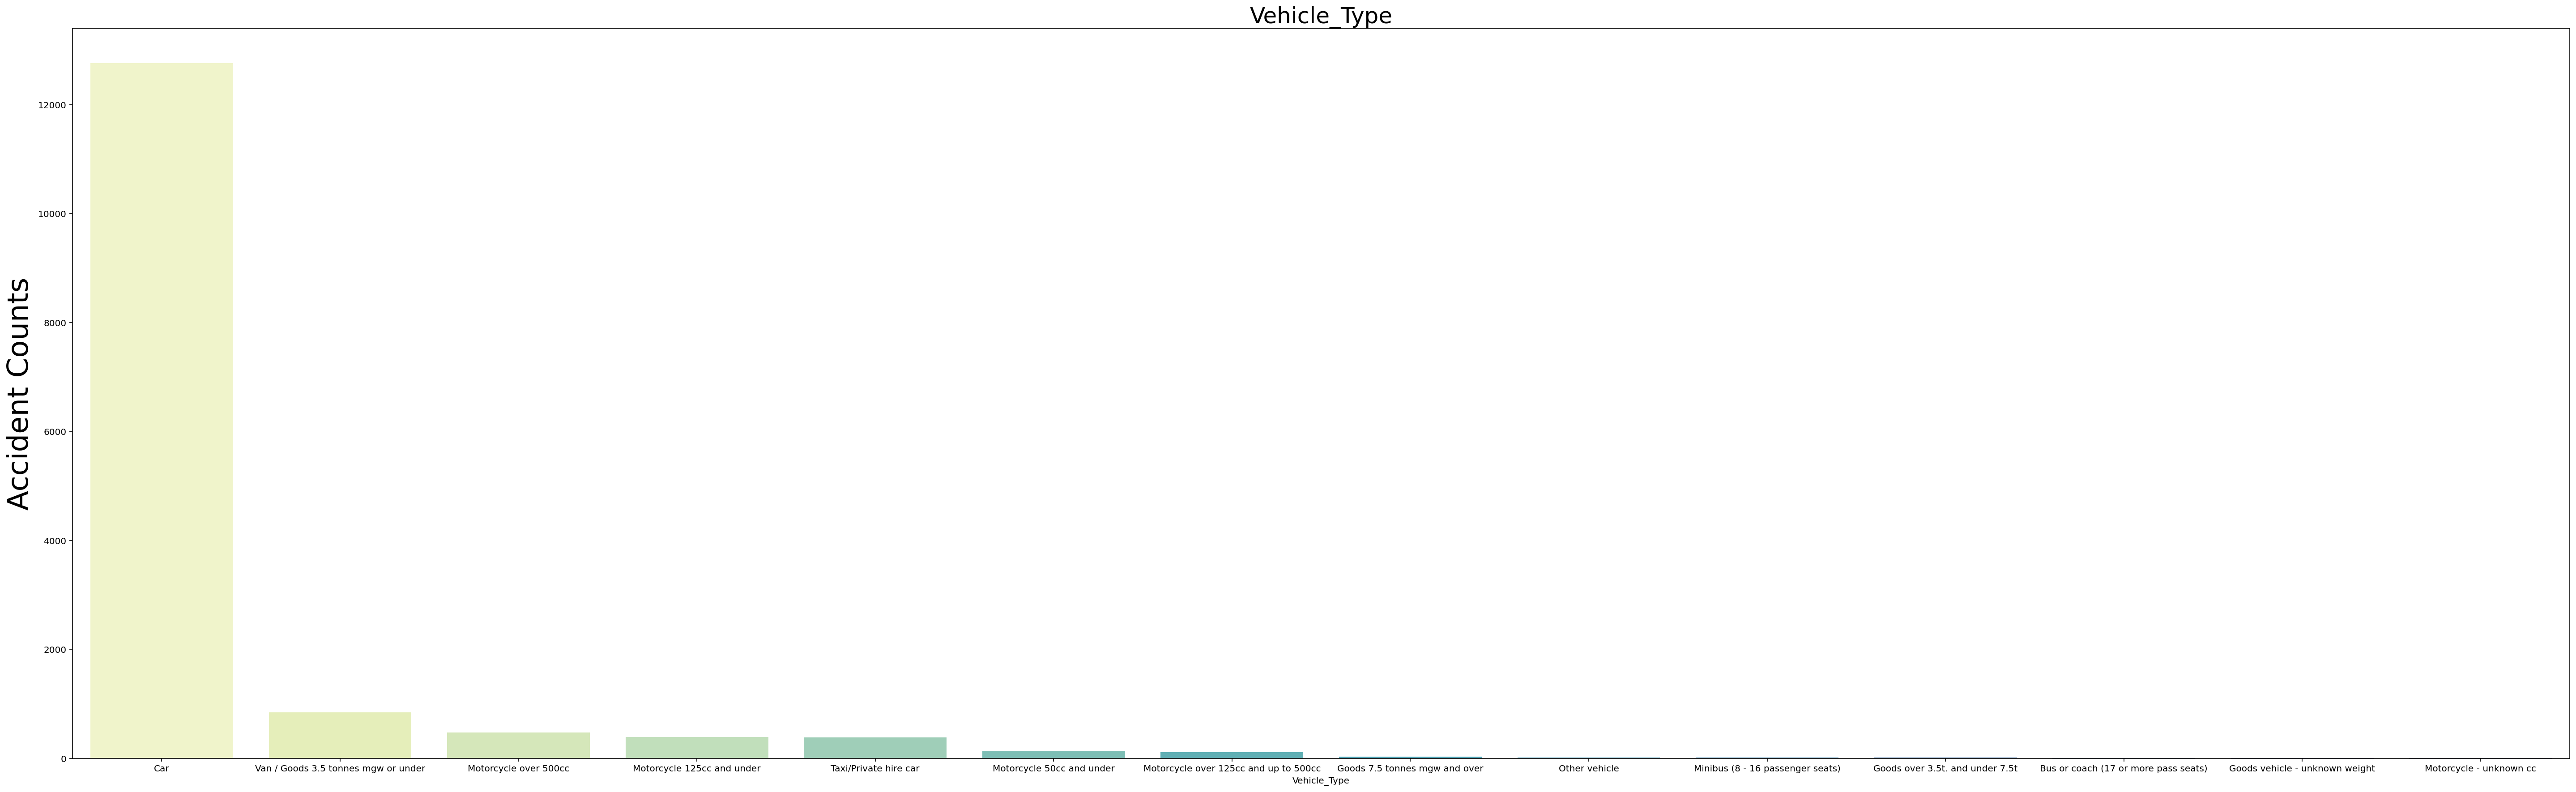

In [52]:
#Distrubution based on Vehicle_Type:
plt.figure(figsize=(50,15))
sns.countplot(x = 'Vehicle_Type',data=Sub_Acc_Veh, 
              order = Sub_Acc_Veh["Vehicle_Type"].value_counts().index, 
              palette = "YlGnBu")
plt.title('Vehicle_Type', fontsize=25)
plt.ylabel("Accident Counts", fontsize = 32)
plt.show()

#### we notice that cars come as top vehicles invloved in car accidents
and this may be because they are used more than other vehicles

C:\Users\Zilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


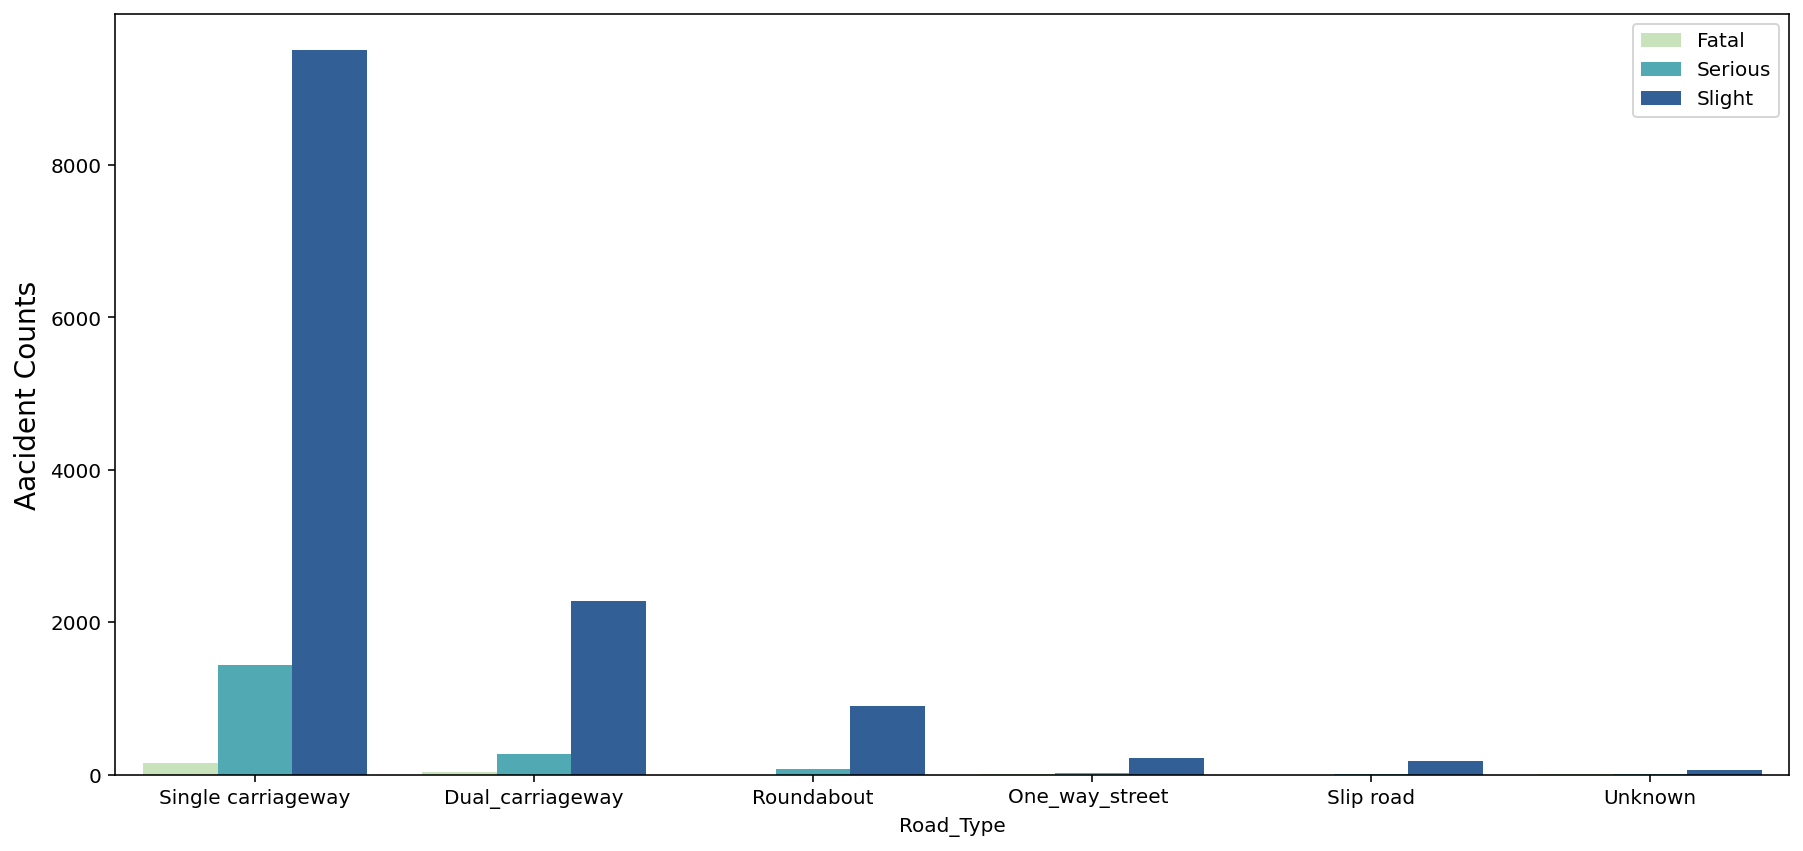

In [57]:
plt.figure(figsize=(15,7))
ax = sns.countplot('Road_Type',hue='Accident_Severity',data=Sub_Acc_Veh, 
                   order = Sub_Acc_Veh["Road_Type"].value_counts().index, palette = "YlGnBu")
ax.set_xticklabels(['Single carriageway','Dual_carriageway','Roundabout',
                    'One_way_street ',
                    'Slip road','Unknown'])
plt.legend(['Fatal','Serious','Slight'])
plt.ylabel("Aacident Counts", fontsize = 14)
plt.show()

#### It clearly shows that most of the accidents are occured at single carriageway and are slightly severity accident.

In [407]:
Sub_Acc_Veh["Speed_limit"].value_counts()

30    9128
60    2360
40    1392
70    1350
50     623
20     160
Name: Speed_limit, dtype: int64

C:\Users\Zilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


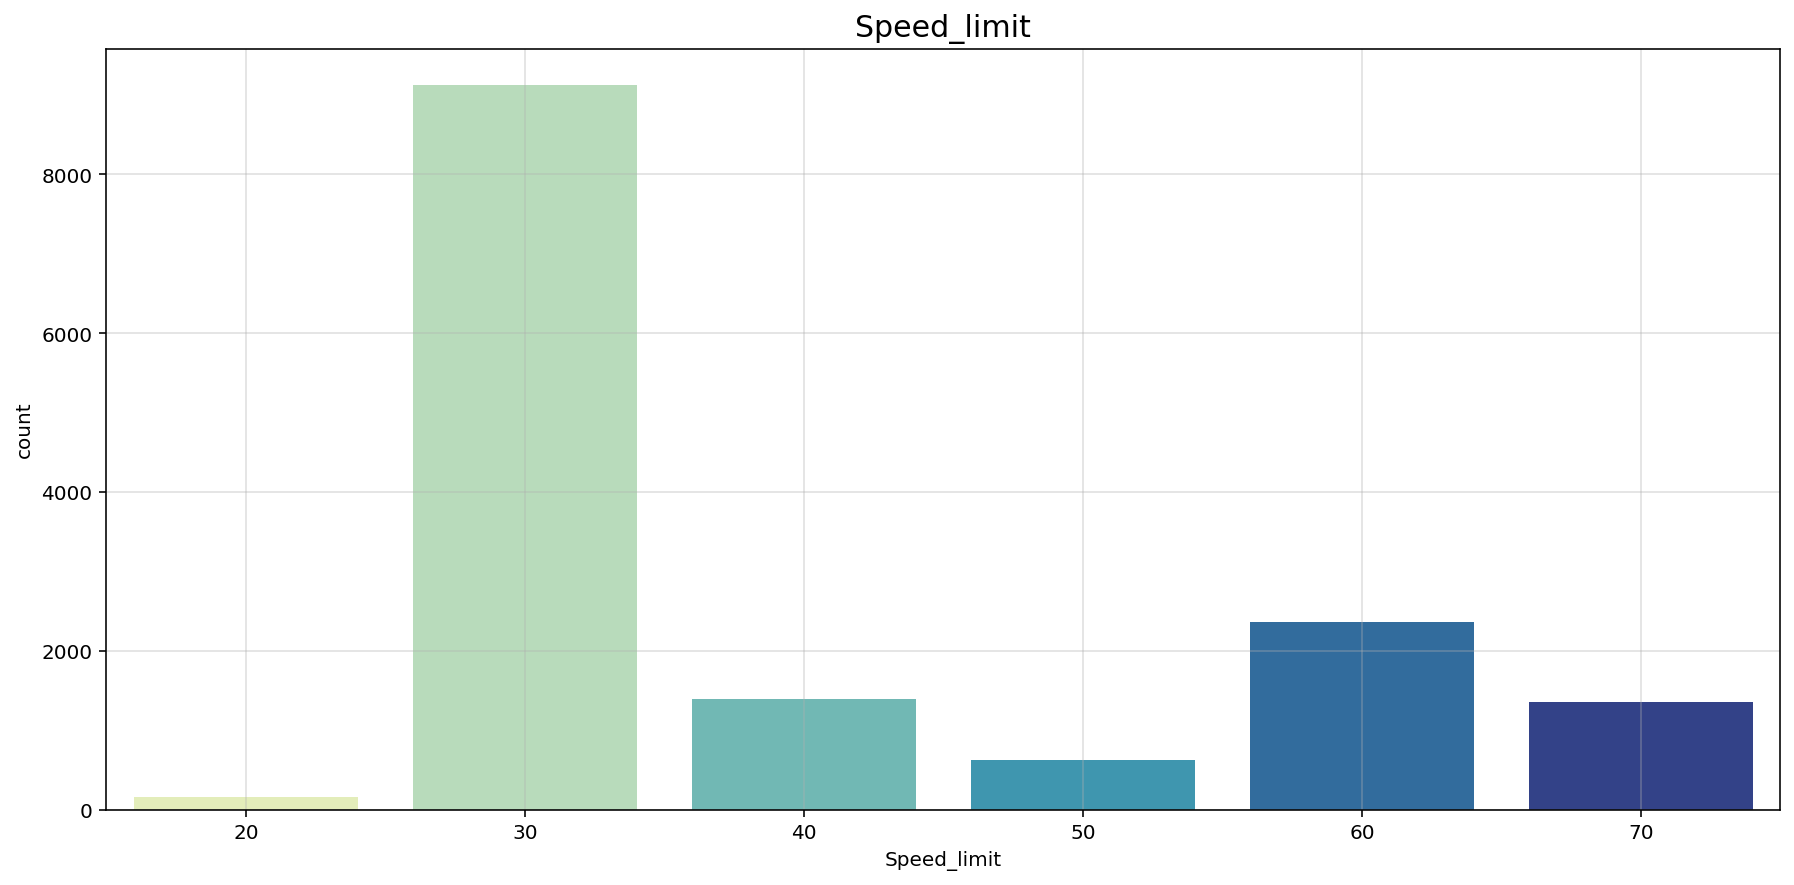

In [413]:
plt.figure(figsize=(15,7))
ax=sns.countplot(Sub_Acc_Veh['Speed_limit'], palette = "YlGnBu")
plt.title('Speed_limit', fontsize=15)
ax.set_xticklabels(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])
plt.grid(alpha=0.4)

#### Most of the accidents occurred on the road where the speed limit is 30.Contrary to what is expect on highway or major roadways.

In [473]:
Sub_Acc_Veh["Weather"].value_counts()

1    12008
2     1792
8      304
9      244
5      242
4      214
3      116
7       75
6       18
Name: Weather, dtype: int64

#### Most of the days the Weather Condition is "fine" (=1), most accidents will likely to be happen then.

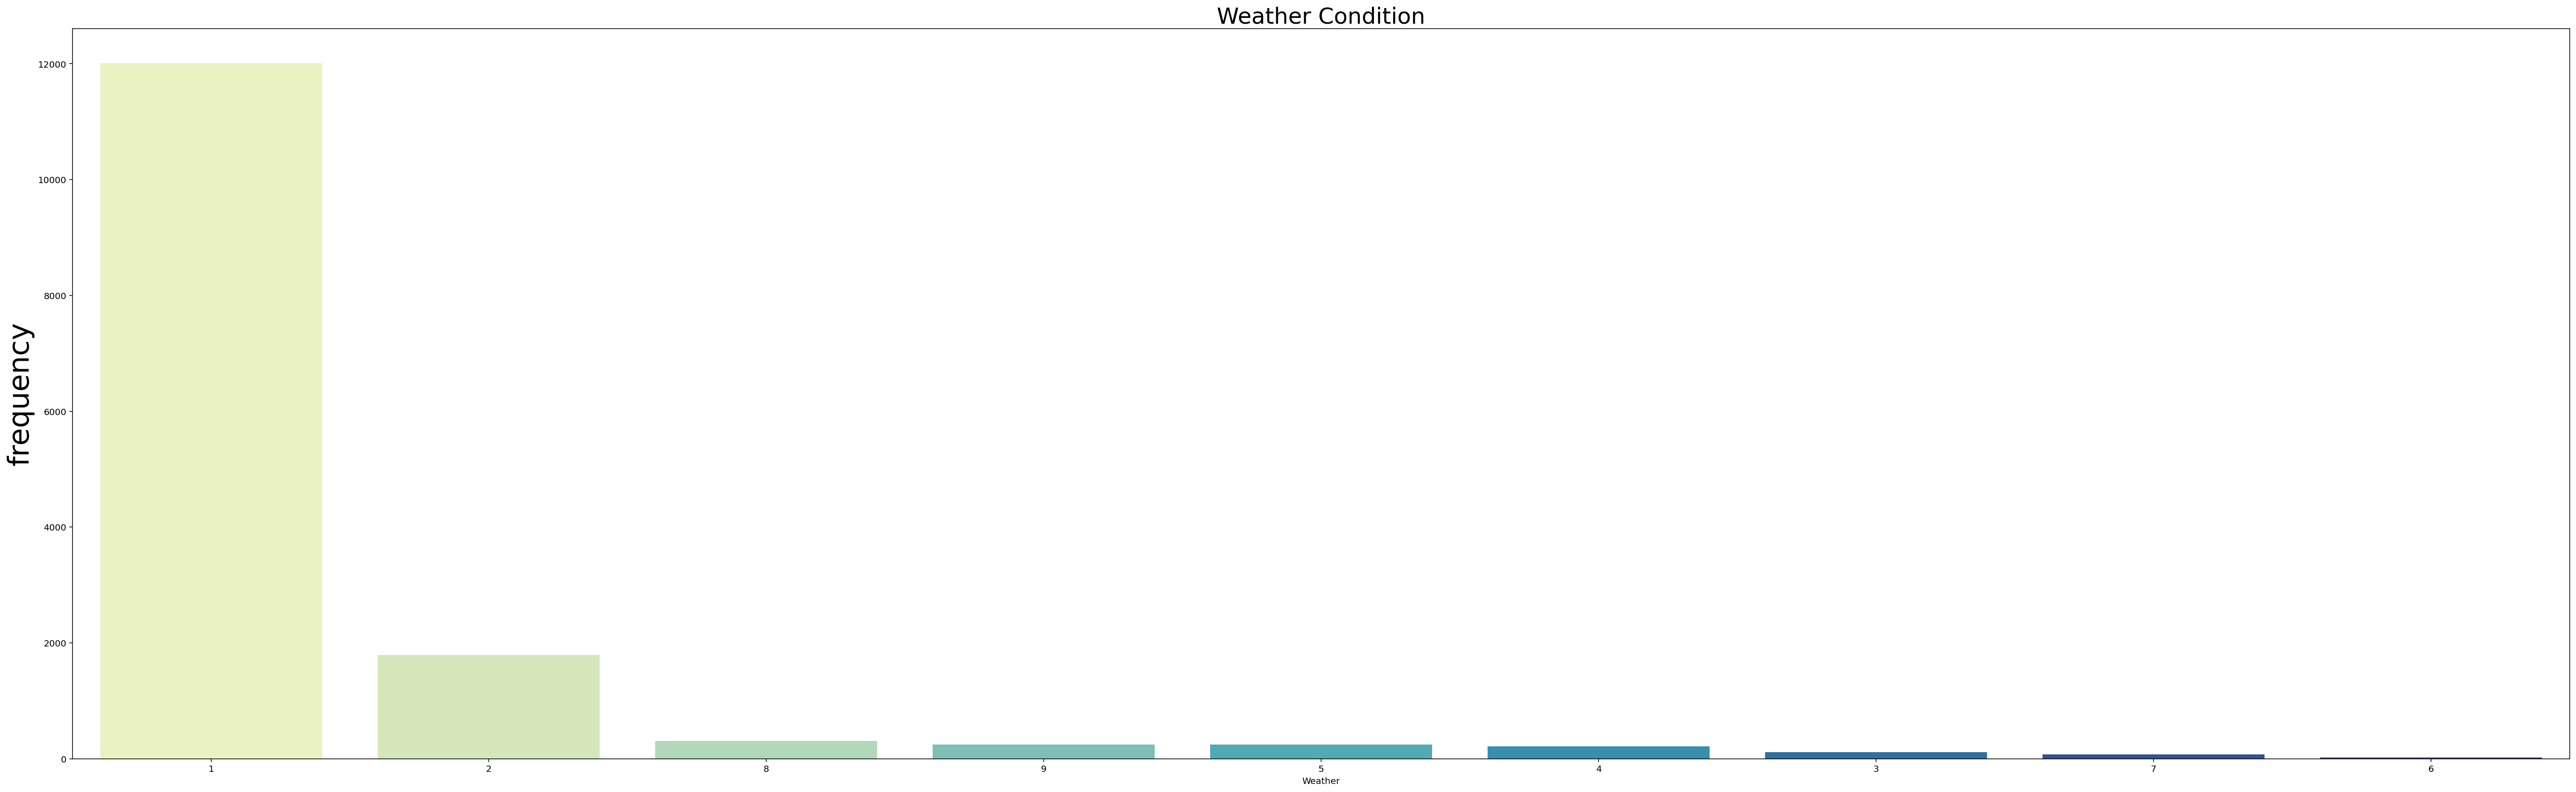

In [469]:
#Distrubution based on Vehicle_Type:
plt.figure(figsize=(50,15))
sns.countplot(x = 'Weather',data=Sub_Acc_Veh, 
              order = Sub_Acc_Veh["Weather"].value_counts().index, 
              palette = "YlGnBu")
plt.title('Weather Condition', fontsize=25)
plt.ylabel("frequency", fontsize = 32)
plt.show()

<AxesSubplot:>

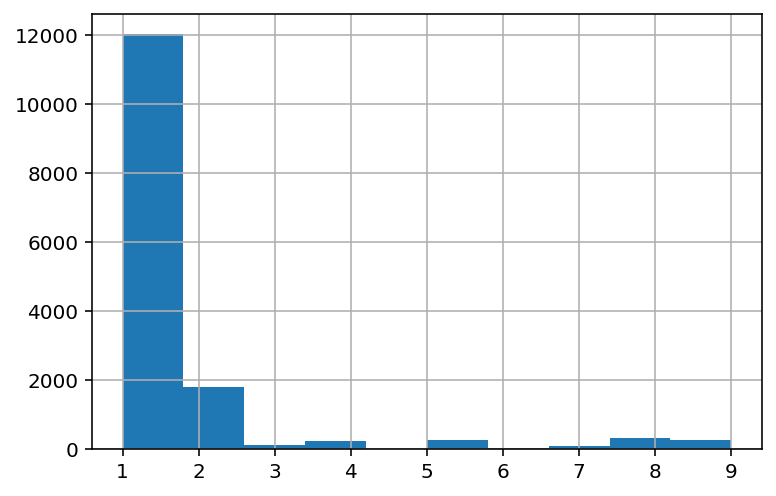

In [470]:
Sub_Acc_Veh["Weather"].hist()

In [340]:
#value_counts(Accident_Severity)
Sub_Acc_Veh["Accident_Severity"].value_counts()

3    13141
2     1750
1      179
Name: Accident_Severity, dtype: int64

In [27]:
#Show Accident_Severity with simple counts
counts = Sub_Acc_Veh.groupby(['Date_time', 'Accident_Severity']).size()

counts = counts.rename_axis(['Date_time', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts

Accident_Severity,fatal,serious,slight
Date_time,,,
2005-01-01 11:42:00,NaN,NaN,1.0
2005-01-02 12:30:00,NaN,NaN,1.0
2005-01-02 13:45:00,NaN,NaN,1.0
2005-01-04 10:30:00,NaN,NaN,1.0
2005-01-04 16:30:00,NaN,NaN,1.0
...,...,...,...
2015-12-31 11:02:00,NaN,NaN,1.0
2015-12-31 14:00:00,NaN,NaN,2.0
2015-12-31 16:37:00,NaN,NaN,1.0


C:\Users\Zilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


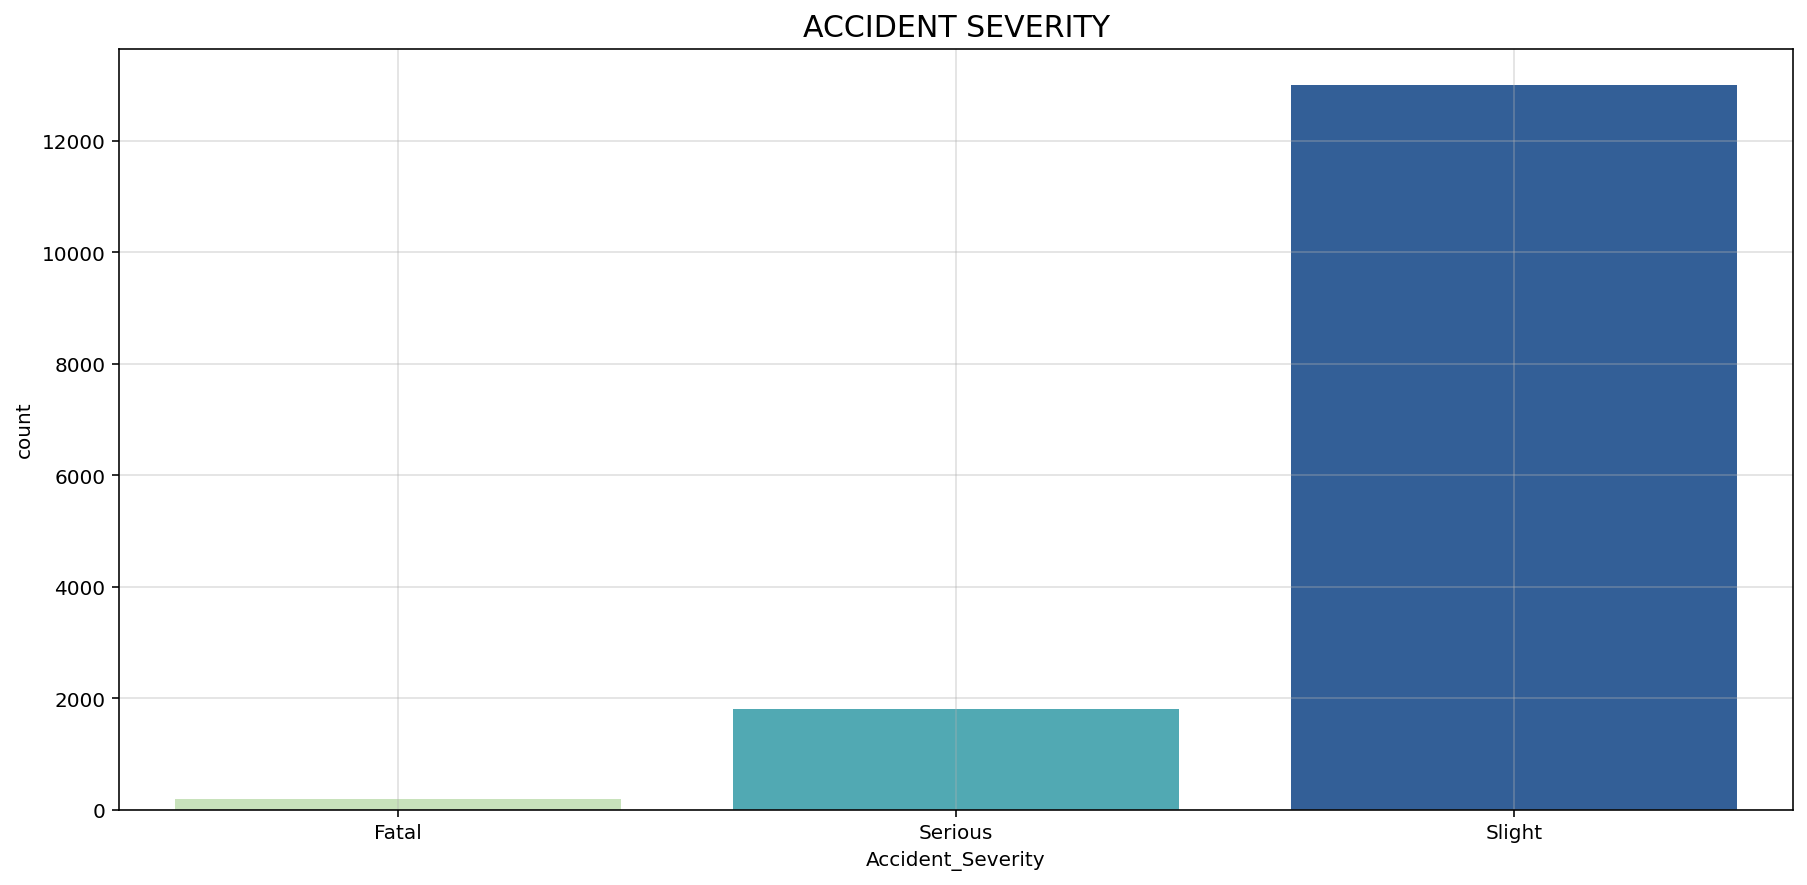

In [405]:
#distribution for ACCIDENT SEVERITY
plt.figure(figsize=(15,7))
ax=sns.countplot(Sub_Acc_Veh['Accident_Severity'], palette = "YlGnBu")
plt.title('ACCIDENT SEVERITY', fontsize=15)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.grid(alpha=0.4)
# 1	Fatal
# 2	Serious
# 3	Slight


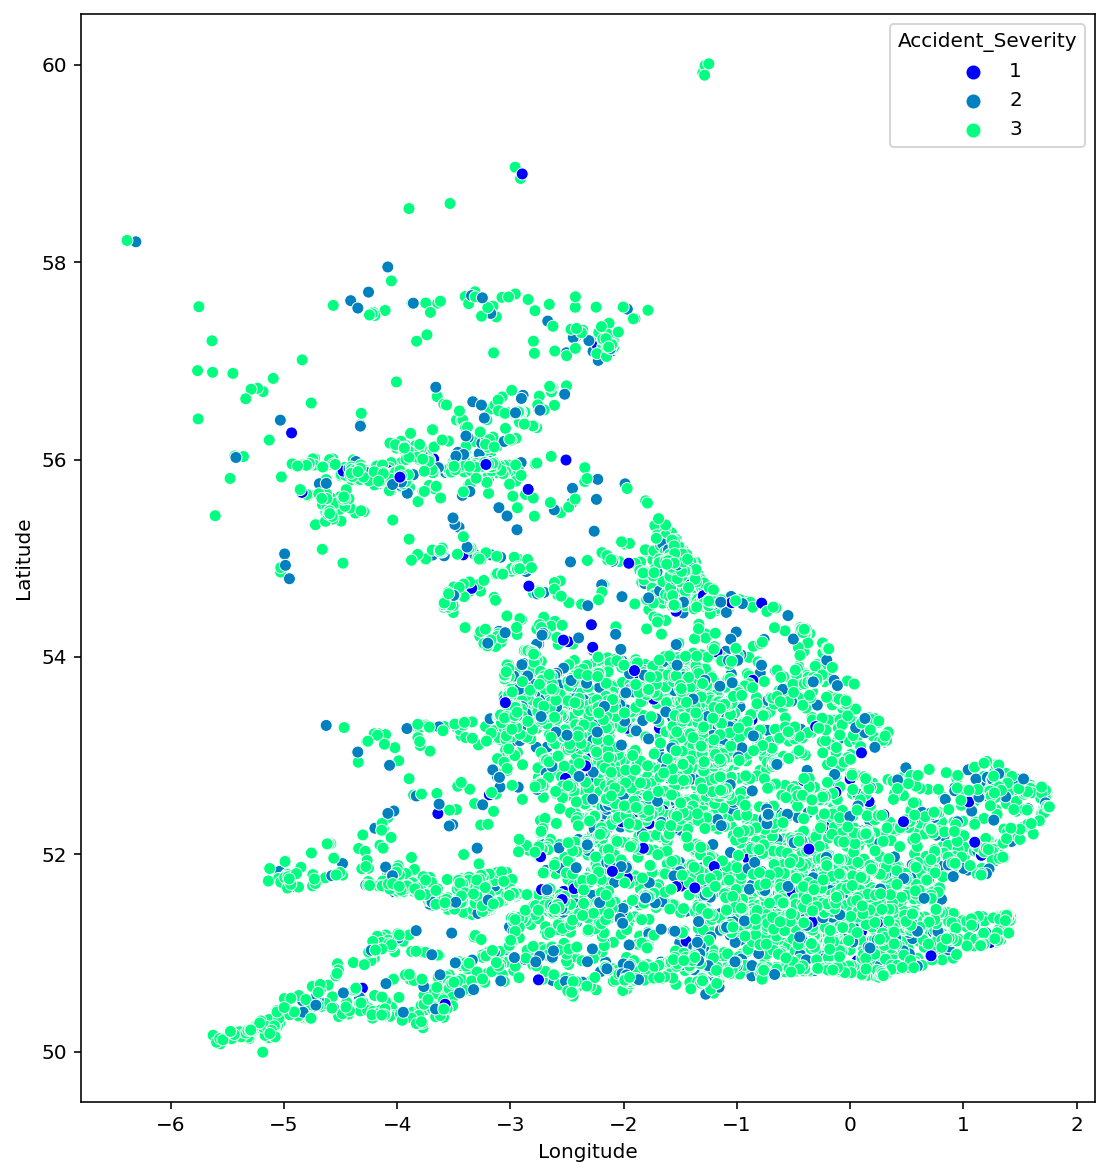

In [28]:
#Accident_Severity by location
plt.figure(figsize = (20,10))
plt.subplot(1,2,2)
sns.scatterplot(data=Sub_Acc_Veh, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()

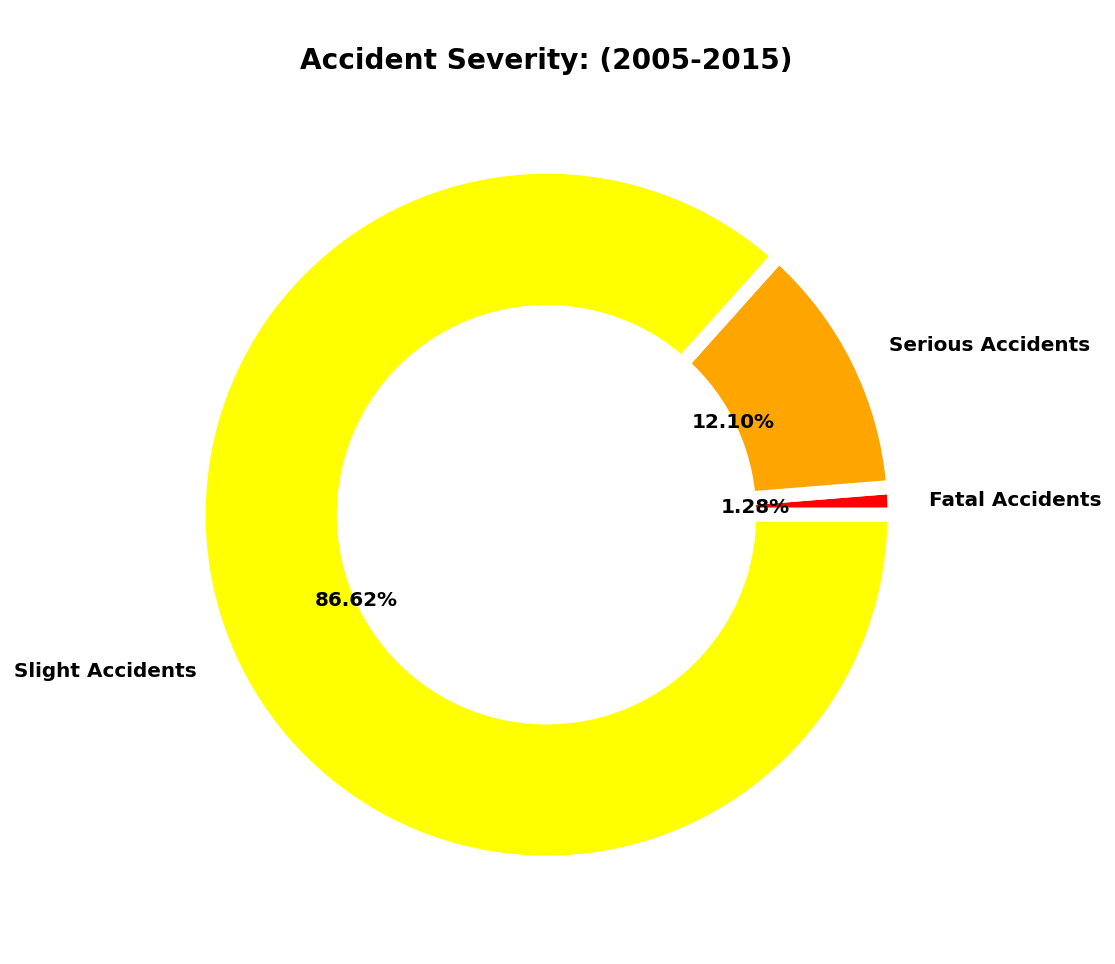

In [58]:
# Show the Accident_Severity
fatal   = Sub_Acc_Veh.Accident_Severity.value_counts()[1]
serious = Sub_Acc_Veh.Accident_Severity.value_counts()[2]
slight  = Sub_Acc_Veh.Accident_Severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart by pie chart
plt.pie(x=size, labels=names, colors=['red', 'orange', 'yellow'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: (2005-2015)', fontsize=14, fontweight='bold')
plt.show()

### Correlation between features

<AxesSubplot:>

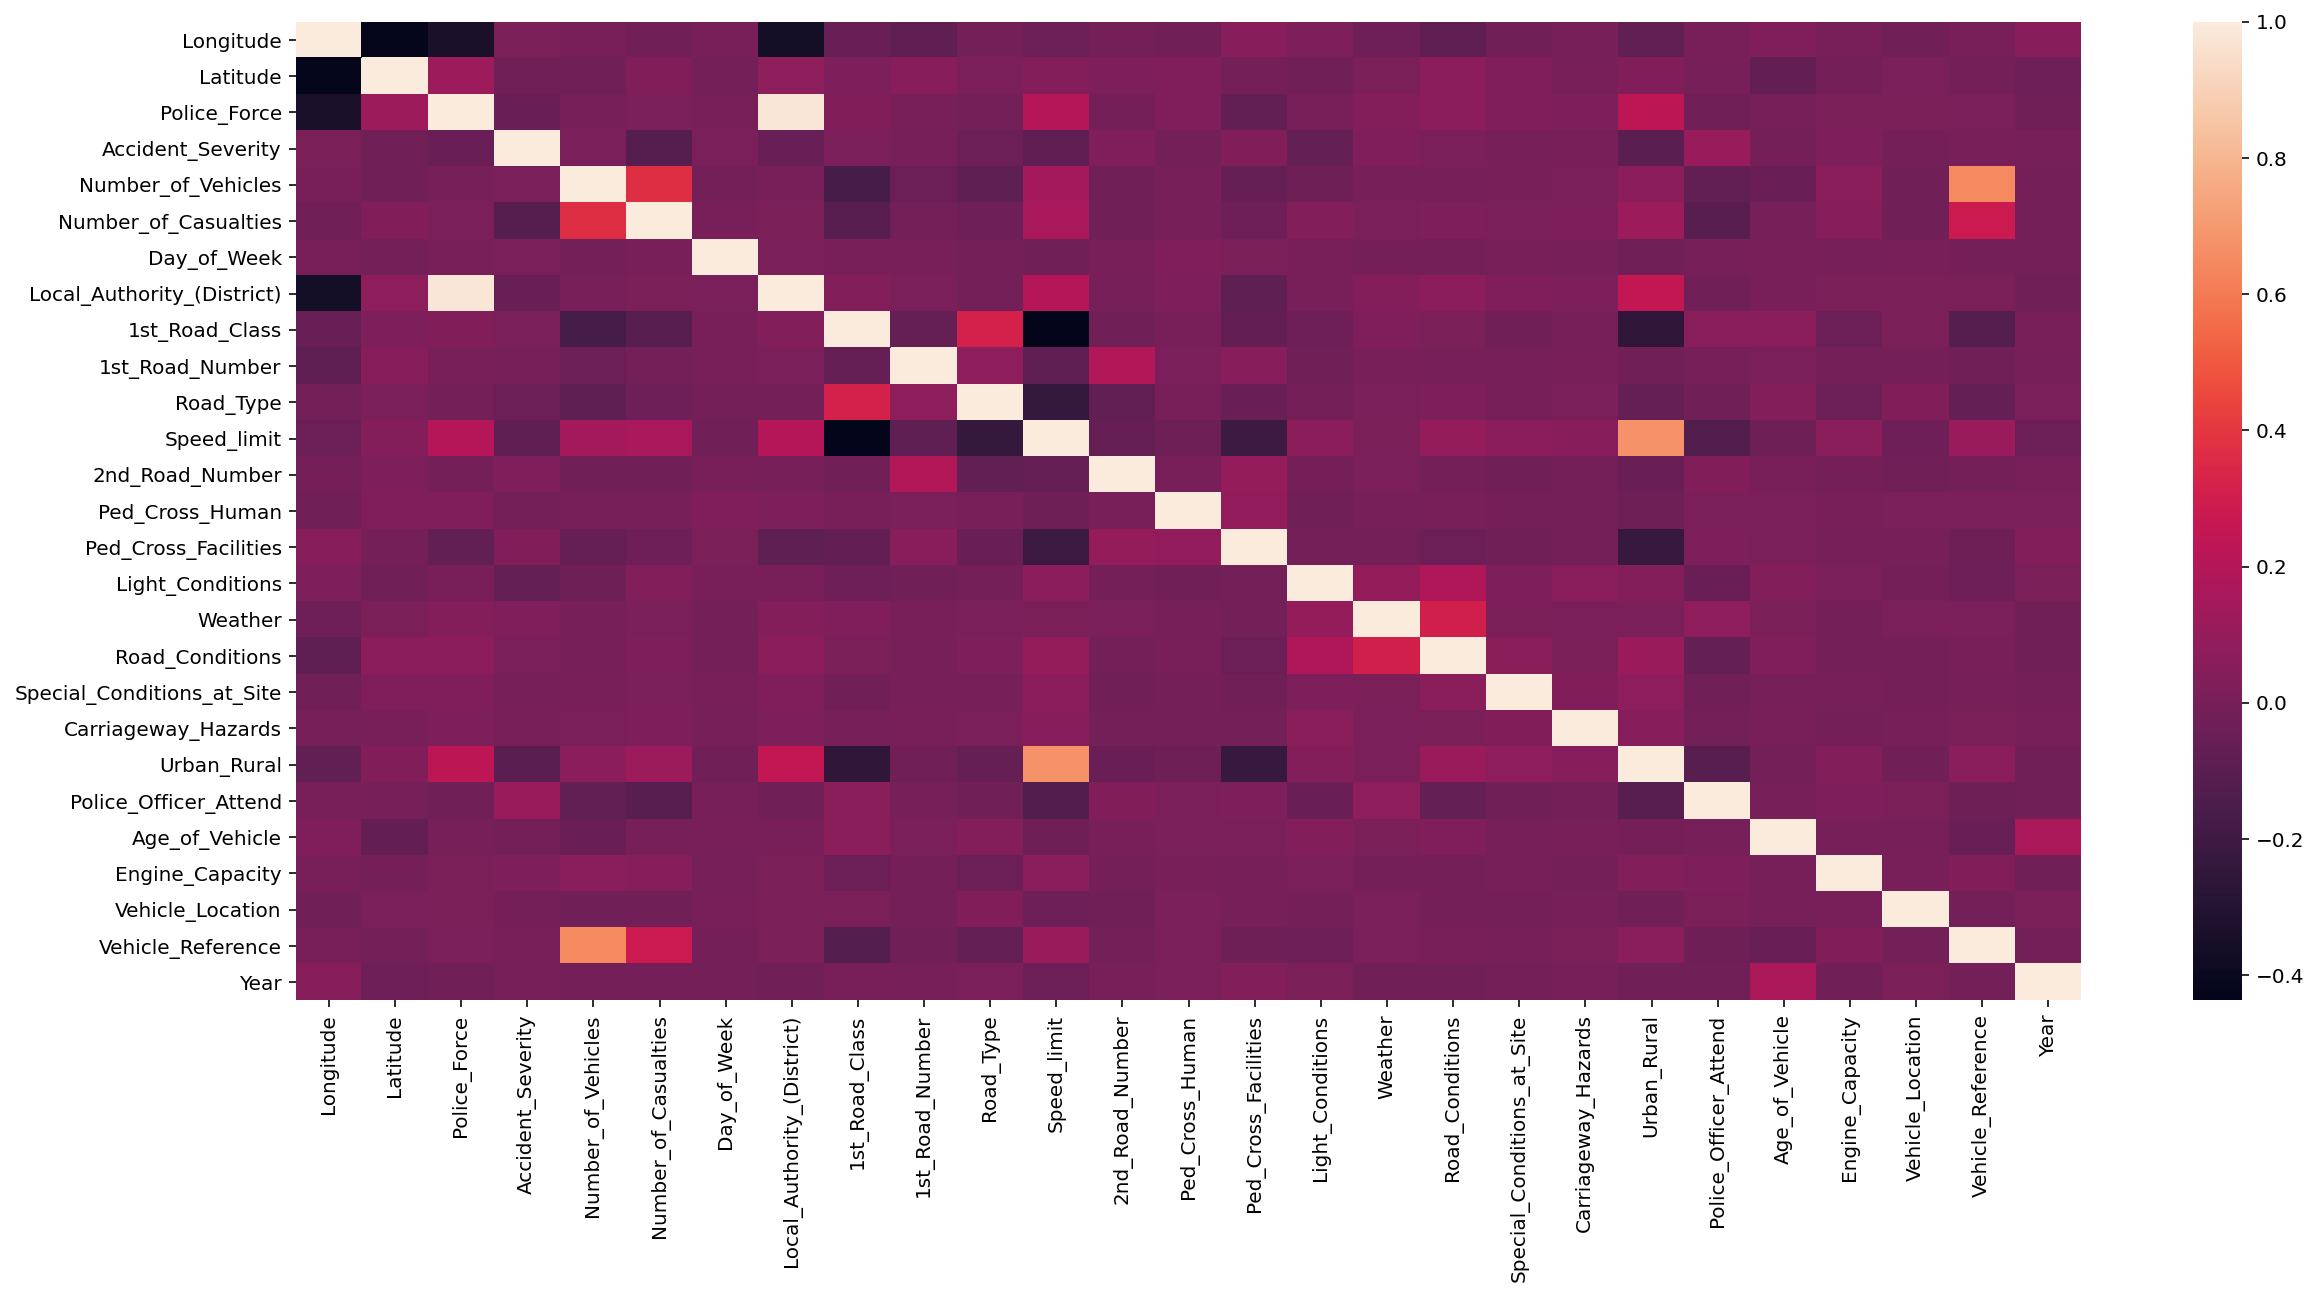

In [415]:
corr = Sub_Acc_Veh.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

#### As we notice that there is not a strong correlations between any features.
just some columns have positive strong correlation such as  (speed limit and Urban Rural),

C:\Users\Zilal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zilal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


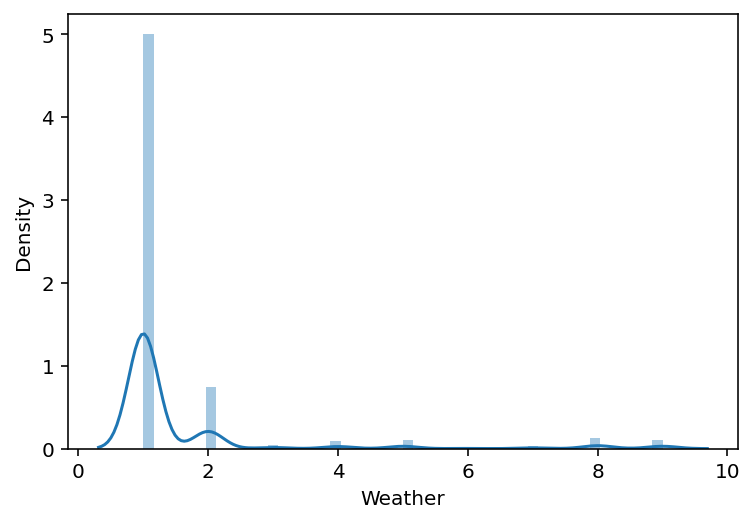

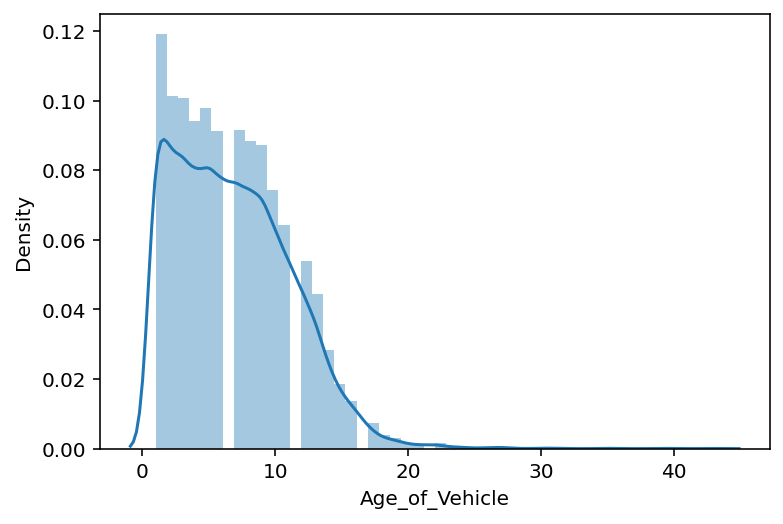

<Figure size 432x288 with 0 Axes>

In [452]:
 sns.distplot(Sub_Acc_Veh['Weather']);
fig = plt.figure()
sns.distplot(Sub_Acc_Veh['Age_of_Vehicle']);
fig = plt.figure()

In [299]:
#save the data after cleaning
Sub_Acc_Veh = Sub_Acc_Veh.reset_index(drop=True)
Sub_Acc_Veh.to_csv("C:/Users/Zilal/Desktop/GA/Capstone_data/Sub_Accident_Mod.csv")

In [301]:
Sub_Acc_Veh.shape

(10241, 48)